<a href="https://colab.research.google.com/github/svanlinden/test/blob/master/tsp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from random import Random
import inspyred
from IPython.core.display import Image
from inspyred.ec import Individual

### Het Handelsreizigerprobleem (Traveling Salesman Problem)
Een handelsreiziger wil besparen op zijn vervoerskosten. Hij moet maandelijks steden a,b,c,d en e eenmaal bezoeken. Wanneer hij in een bepaalde stad vertrekt, moet hij daar ook terug uit komen.

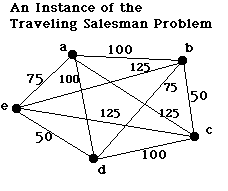

In [ ]:
Image('../images/tsp.png')

Hij zoekt de meest optimale weg om dit te doen.  In steden.csv vind je een tabel met de afstanden tussen deze steden, lees dit in met Pandas.

In [ ]:
steden = pd.read_csv('../datasets/steden.csv')
steden.index = steden.columns
steden

,a,b,c,d,e
a,0,100,125,100,75
b,100,0,50,75,125
c,125,50,0,100,125
d,100,75,100,0,50
e,75,125,125,50,0


Schrijf een functie <code>afstand</code> die voor een route, een rij van 5 indices dus, kan berekenen wat de afstand is voor die combinatie, bijvoorbeeld de route [0,1,2,3,4] gaat van a naar b naar c naar d naar e naar a.
```python
def afstand(route: [int]) -> float:
    pass # hier komt jouw code
```
Je kunt dit als volgt aanpakken:
* creër een kopie van de route waarbij alle indices een plaats opschuift (zoek in Numpy voor een functie)
* zip de twee rijen aan elkaar tot een rij van tuples (zip functie gebruiken), zodat je dit krijgt
[(0, 1), (1, 2), (2, 3), (3, 4), (4, 0)]
* zoek afstanden op in afstandstabel voor de tuples, maak een lijst en sommeer.

In [ ]:
def afstand(route: [int]) -> float:
    return sum(steden.iloc[i,j] for i,j in zip(route, np.roll(route, -1)))

Schrijf een functie <code>generate</code> die één kandidaat-oplossing voor een route kan genereren.
Hierbij moet je opletten dat je enkel een **geldige routes** genereert. Een route is een permutatie van $n$ getallen, met $n$ het aantal steden. Zoek eens in Numpy library naar een oplossing.

Deze functie **moet** een gewone Python-lijst teruggeven en geen Numpy array. Indien nodig omzetten naar een Python-lijst of type hinting toevoegen (-> []) aan functie definitie.

De functie moet ook volgende argumenten (ook al gebruik je ze niet allemaal) en return type hebben:

```python
def generate(random = None, args = {}) -> []:
    # je kan args dictionary gebruiken om parameters door te geven naar generate (zie verder)
    n_cities = args.get('n_cities', 5)
    # hier komt jouw code
```

In [ ]:
def generate(random = None, args = {}) -> []:
    n_cities = args.get('n_cities', 5)
    return np.random.permutation(n_cities)

In [ ]:
generate(args = {'n_cities' : 10})

array([3, 1, 0, 4, 2])

Schrijf een functie <code>evaluate</code> die één kandidaat-oplossing gegeneerd door <code>generate</code> kan evalueren.

De functie moet volgende argumenten hebben (ook al gebruik je ze niet allemaal):
```python
def evaluate(candidates, args):
    pass # hier komt jouw code
```

In [ ]:
def evaluate(candidates, args = {}):
    fitness = []
    for route in candidates:
        fitness.append(afstand(route))
    return fitness

Gebruik nu een Genetic Algorithm uit de<code>inpyred</code>-library om de meest optimale oplossing te vinden. Je kan als extra parameter aan de <code>evolve</code>-methode bijvoorbeeld, <code>n_cities = steden.shape[0]</code> meegeven om je oplossing meer algemeen te maken.

Vergeet ook niet van het mee te geven dat het hier om een minimalisatie gaat. Sorteer omgekeerd en print alle oplossingen uit.

In [ ]:
rand = Random()
ga = inspyred.ec.GA(rand)
population: [Individual] = ga.evolve(
    generator=generate,
    evaluator=evaluate,
    pop_size=100,
    maximize=False,
    bounder=inspyred.ec.Bounder(0, steden.shape[0]),
    max_evaluations=1000,
    mutation_rate=0.25,
    n_cities = steden.shape[0])

# Sort and print the best individual, who will be at index 0.
population.sort(reverse=True)
for solution in population:
    print('{} -> {}'.format(solution.candidate, afstand(solution.candidate)))

[3 4 0 2 1] -> 375
[3 2 1 0 4] -> 375
[4 3 1 2 0] -> 375
[0 1 2 3 4] -> 375
[3 1 2 0 4] -> 375
[3 2 1 0 4] -> 375
[3 4 0 2 1] -> 375
[4 0 2 1 3] -> 375
[1 3 4 0 2] -> 375
[4 3 2 1 0] -> 375
[0 2 1 3 4] -> 375
[1 0 4 3 2] -> 375
[0 4 3 2 1] -> 375
[1 2 3 4 0] -> 375
[3 4 0 1 2] -> 375
[4 0 2 1 3] -> 375
[3 1 2 0 4] -> 375
[2 1 3 4 0] -> 375
[0 2 1 3 4] -> 375
[0 4 3 1 2] -> 375
[4 3 2 1 0] -> 375
[1 0 3 4 2] -> 425
[3 0 1 2 4] -> 425
[1 2 4 3 0] -> 425
[1 3 0 4 2] -> 425
[0 3 4 2 1] -> 425
[4 0 3 1 2] -> 425
[4 2 1 0 3] -> 425
[3 4 2 1 0] -> 425
[4 2 1 3 0] -> 425
[1 3 0 4 2] -> 425
[0 3 1 2 4] -> 425
[3 1 2 4 0] -> 425
[3 0 4 2 1] -> 425
[2 1 3 0 4] -> 425
[2 1 0 3 4] -> 425
[0 1 2 4 3] -> 425
[4 2 1 0 3] -> 425
[4 0 3 2 1] -> 450
[2 1 4 3 0] -> 450
[2 0 3 4 1] -> 450
[3 0 2 1 4] -> 450
[1 4 0 3 2] -> 450
[3 0 2 1 4] -> 450
[0 3 4 1 2] -> 450
[2 1 4 3 0] -> 450
[0 4 1 2 3] -> 450
[4 0 3 2 1] -> 450
[4 1 2 0 3] -> 450
[4 1 2 0 3] -> 450
[2 1 4 0 3] -> 450
[2 4 3 1 0] -> 475
[1 0 4 2 3] 

In [1]:
print('opvulling om te kunnen afdrukken \n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n')

opvulling om te kunnen afdrukken 
















